# Solving the n-Queens Problem using Local Search

__Goal:__ Find an arrangement of n queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

__State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We will call a state a "board."

__Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).

## Helper functions

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))


def value(board):
    """Caclulate the number of conflicts, i.e., the objective function."""
    
    board = np.array(board)
    
    n = len(board)
    val = 0

    # check horizontal (we do not check vertical since the state space is restricted to one queen per col)
    for i in range(n): val += math.comb(np.sum(board == i), 2)
    #print(f"Horizontal value: {val}")
    
    # check for each queen diagonally up and down (only to the right side of the queen)
    for j in range(n):
        q_up = board[j]
        q_down = board[j]
     
        for jj in range(j+1, n):
            q_up -= 1
            q_down += 1
            if board[jj] == q_up: val += 1
            if board[jj] == q_down: val += 1
        #print(f"Value after queen {j}: {val}")
       
    return(val)    
    
def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: 1 and j are switched. Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with value: {value(board)}")
    plt.show()

In [123]:
# faster value function

def comb2(n): return n*(n-1)//2

def value2(board):
    """Caclulate the number of conflicts, i.e., the objective function."""
    board = np.array(board)
    n = len(board)
    conflicts = 0
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    for i in horizontal_cnt:
        conflicts += comb2(i)
    for i in diagonal1_cnt:
        conflicts += comb2(i)
    for i in diagonal2_cnt:
        conflicts += comb2(i)
        
    return(conflicts)

In [119]:
def value4(board):
    """Caclulate the number of conflicts, i.e., the objective function."""
    #board = np.array(board)
    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
        
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

In [107]:
def value3(board):
    """Caclulate the number of conflicts, i.e., the objective function."""
    
    board = np.array(board)
    
    n = len(board)

    diag_down = np.subtract(board, range(0, n))
    diag_up = np.add(board, range(0, n))

    elements, counts_horiz = np.unique(board, return_counts = True)
    elements, counts_up = np.unique(diag_up, return_counts = True)
    elements, counts_down = np.unique(diag_down, return_counts = True)

    all = np.concatenate((counts_horiz, counts_up, counts_down))

#    return np.sum([math.comb(c, 2) for c in all])
    return np.sum([comb2(c) for c in all])
#    return np.sum(map(comb2, all))

In [69]:
b = random_board(20)

In [71]:
%%timeit

value(b)

499 µs ± 7.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [126]:
%%timeit

value2(b)

79.8 µs ± 944 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [82]:
%%timeit

value3(b)

124 µs ± 709 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [125]:
%%timeit

value4(b)

69.1 µs ± 879 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [124]:
b = random_board(20)
[value(b), value2(b), value3(b), value4(b)]

[20, 20, 20, 20]

## Create a board

Board with value: 5


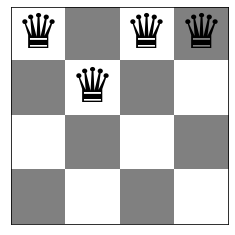

Queens are at: [0 1 0 0]


In [24]:
board = random_board(4)

show_board(board)
print(f"Queens are at: {board}")

## Steepest-ascend Hill Climbing Search

Board with value: 5


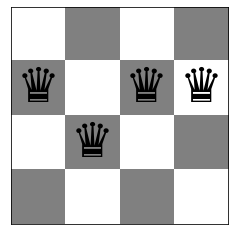

[[2 5 3 5]
 [5 6 5 5]
 [3 5 4 5]
 [4 4 4 3]]
Best value: 5 - New minimum: 2
Board with value: 2


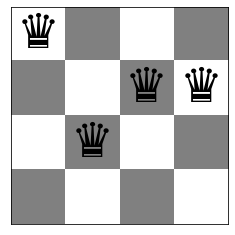

[[2 3 2 4]
 [5 4 2 2]
 [3 2 3 3]
 [4 2 1 2]]
Best value: 2 - New minimum: 1
Board with value: 1


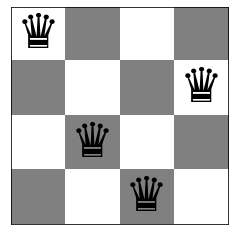

[[1 1 2 3]
 [4 2 2 1]
 [2 1 3 3]
 [3 2 1 3]]
Best value: 1 - New minimum: 1
Board with value: 1


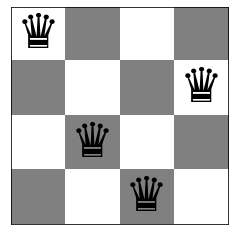

1

In [5]:
def SAHC(board, verbose = False):
    """perform steepest-ascend hill climbing"""
    
    if verbose: show_board(board)
    
    n = len(board)
    
    best_val = value(board)                  # current best value
    vals = np.full([n,n], -1, dtype = int)   # array to store the values 

    while True:        
        # go though columns
        for j in range(n):
            # test each position
            old_q = board[j]
            for i in range(n):
                board[j] = i
                vals[i,j] = value(board)
            board[j] = old_q
        new_min = np.min(vals)
        
        if verbose: print(vals)
        if verbose: print(f"Best value: {best_val} - New minimum: {new_min}")
        
        # TODO: We could allow side steps.
        if(best_val > new_min):
            # accept best move (break ties randomly)
            w = np.where(vals == new_min)
            best = [a for a in zip(w[0], w[1])]
            best = best[np.random.randint(0,len(best))]
            board[best[1]] = best[0]
            best_val = new_min
            
            if verbose: show_board(board)
        
        # no more improvement
        else: return(board)
        
b = SAHC(board, verbose = True) 
show_board(b)

value(b)

## Stochastic Hill Climbing

In [8]:
# Code goes here

## Random Restarts

Needed restarts: 6
Board with value: 0


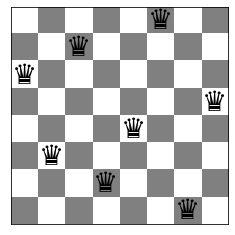

In [9]:
def random_restarts(n, opt, restarts = 100, verbose = True):
    """Hill climbing with random restarts"""
    
    best_board = random_board(n)
    best_val = value(best_board)
    
    
    for i in range(restarts):
        board = random_board(n)
        board = opt(board, verbose = False)
        val = value(board)
        
        # remember the best board
        if val < best_val:
            best_board = board
            best_val = val
        
        if val == 0: 
            if verbose: print(f"Needed restarts: {i+1}")
            return(board)
    
    if verbose: print(f"Could not find a solution with {restarts} restarts.")
    return best_board
    
board = random_restarts(8, SAHC)
show_board(board, fontsize = 28)

## Simulated Annealing

In [10]:
# Code goes here

## Genetic Algorithm

In [11]:
# Code goes here

## Compare Performance

Use runtime, scalability, and best objective function value to compare the algorithms on boards of different sizes.  

In [12]:
# I could use timeit but I already do multiple runs for the objective function value so I sue time
import time

N = 20                               # number of replications (Note: should be 100 or more)
ns = [4, 5, 6, 7, 8, 9, 10, 11, 12]  # board sizes

mean_val = np.empty(len(ns), dtype=float)
mean_t = np.empty(len(ns), dtype=float)

for i,n in enumerate(ns):
    val = np.empty(N, dtype=int)
    t = np.empty(N, dtype=float)
    
    for j in range(N):
        t0 = time.time()
        board = random_board(n)
        sol = SAHC(board) 
        t1 = time.time()
       
        val[j] = value(sol)
        t[j] = t1-t0
    
    mean_val[i] = np.average(val)
    mean_t[i] = np.average(t)
    
    print(f"n = {n}:\tmean(time) = {round(mean_t[i]* 1e3, 2)} ms \tmean(objective) = {mean_val[i]}")

n = 4:	mean(time) = 3.39 ms 	mean(objective) = 0.55
n = 5:	mean(time) = 6.21 ms 	mean(objective) = 0.45
n = 6:	mean(time) = 15.35 ms 	mean(objective) = 1.05
n = 7:	mean(time) = 21.23 ms 	mean(objective) = 1.0
n = 8:	mean(time) = 42.87 ms 	mean(objective) = 1.15
n = 9:	mean(time) = 72.3 ms 	mean(objective) = 1.1
n = 10:	mean(time) = 113.06 ms 	mean(objective) = 1.95
n = 11:	mean(time) = 149.16 ms 	mean(objective) = 1.8
n = 12:	mean(time) = 213.09 ms 	mean(objective) = 1.9


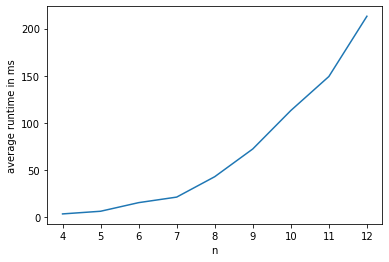

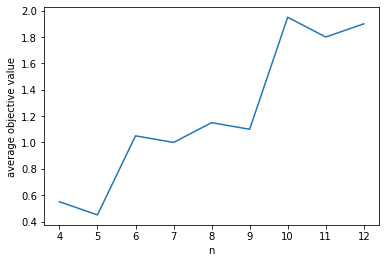

In [13]:
import matplotlib.pyplot as plt

plt.plot(ns, mean_t * 1e3)
plt.xlabel("n")
plt.ylabel("average runtime in ms")
plt.show()

plt.plot(ns, mean_val)
plt.xlabel("n")
plt.ylabel("average objective value")
plt.show()

In [18]:
RESTARTS = 100

mean_val = np.empty(len(ns), dtype=float)
mean_t = np.empty(len(ns), dtype=float)

for i,n in enumerate(ns):
    val = np.empty(N, dtype=int)
    t = np.empty(N, dtype=float)
    
    for j in range(N):
        t0 = time.time()
        sol = random_restarts(n, SAHC, restarts = RESTARTS, verbose = False) 
        t1 = time.time()
       
        val[j] = value(sol)
        t[j] = t1-t0
    
    mean_val[i] = np.average(val)
    mean_t[i] = np.average(t)
    
    print(f"n = {n}:\tmean(time) = {round(mean_t[i]* 1e3, 2)} ms \tmean(objective) = {mean_val[i]}")

n = 4:	mean(time) = 6.18 ms 	mean(objective) = 0.0
n = 5:	mean(time) = 7.89 ms 	mean(objective) = 0.0
n = 6:	mean(time) = 133.42 ms 	mean(objective) = 0.0
n = 7:	mean(time) = 94.71 ms 	mean(objective) = 0.0
n = 8:	mean(time) = 184.45 ms 	mean(objective) = 0.0
n = 9:	mean(time) = 407.23 ms 	mean(objective) = 0.0
n = 10:	mean(time) = 1346.62 ms 	mean(objective) = 0.0
n = 11:	mean(time) = 3021.2 ms 	mean(objective) = 0.0
n = 12:	mean(time) = 4139.12 ms 	mean(objective) = 0.0


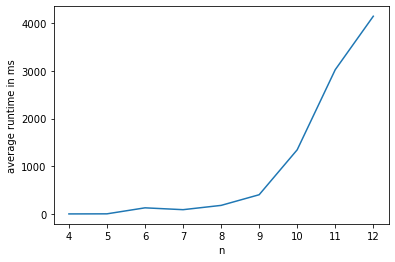

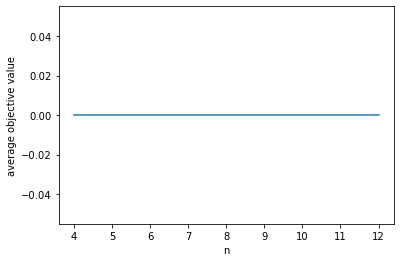

In [19]:
plt.plot(ns, mean_t * 1e3)
plt.xlabel("n")
plt.ylabel("average runtime in ms")
plt.show()

plt.plot(ns, mean_val)
plt.xlabel("n")
plt.ylabel("average objective value")
plt.show()